## Assignment
In this exercise, we are providing you with an example of financial data (all numbers are fictional).

You need to create an algorithm that can find outliers in this data by one column / several columns. E.g. some members have extremely high costs in the current month and your solution should be able to detect such records. Think about features and how you would explain them to business people.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sfr_test.csv')

In [3]:
df.head()

,member_unique_id,gender,dob,eligible_year,eligible_month,affiliation_type,pbp_group,plan_name,npi,line_of_business,...,pcp_ffs,plan_premium,prof,reinsurance,risk_score_partd,rx,rx_rebates,rx_with_rebates,rx_without_rebates,spec_cap
0,1,F,21/06/1990,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$3,507.00",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$843.78
1,2,M,02/01/1948,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$6,204.84",$0.00,$8.13,$0.00,"$11,289.69",$0.00,"$10,688.46","$10,859.82",$906.77
2,3,M,14/06/1948,2020,202006,Affiliate,NON-SNP,MEDICARE - CAREFREE,1,HMO,...,$0.00,"$4,012.46",$0.00,$7.92,$0.00,$0.00,$0.00,$0.00,$0.00,$815.84
3,4,M,10/02/1954,2020,202006,Affiliate,D-SNP,MEDICARE - CARENEEDS,1,HMO,...,$0.00,"$9,770.61",$0.00,$8.30,$0.00,$73.88,$0.00,$62.87,$64.91,$846.26
4,5,M,31/12/1953,2020,202006,Affiliate,NON-SNP,NaN,1,HMO,...,$0.00,"$19,976.13","$8,875.80",$8.90,$0.00,$522.48,$0.00,$517.56,$606.01,$867.55


In [4]:
def find_columns_with_dollar_sign(df):
    dollar_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column contains string values
            if df[column].str.contains('\$').any():  # Check if any cell in the column contains '$'
                dollar_columns.append(column)
    return dollar_columns

In [5]:
currency_columns = find_columns_with_dollar_sign(df)

In [6]:
currency_columns

['ipa_funding',
 'ma_premium',
 'ma_risk_score',
 'mbr_with_rx_rebates',
 'partd_premium',
 'pcp_cap',
 'pcp_ffs',
 'plan_premium',
 'prof',
 'reinsurance',
 'risk_score_partd',
 'rx',
 'rx_rebates',
 'rx_with_rebates',
 'rx_without_rebates',
 'spec_cap']

In [7]:
df[currency_columns] = df[currency_columns].replace('[\$,]', '', regex=True).astype(float)

We will consider two approaches to the outlier detection problem we are having: uni- and multi-variate.

Uni-Variate Outlier Detection

In [9]:
df[currency_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ipa_funding,10530.0,10657.849594,7690.191694,1302.36,5390.6450,8723.135,13444.6325,113850.93
ma_premium,10530.0,12311.727551,8955.579076,1394.85,6200.2550,10060.455,15479.8400,155112.65
ma_risk_score,10530.0,14.601082,11.398322,0.00,6.5025,11.740,18.9200,174.60
mbr_with_rx_rebates,10530.0,500.425354,1130.533796,13.94,197.2100,312.365,499.3525,32687.50
partd_premium,10530.0,281.523642,239.155174,8.62,130.7800,220.590,352.0325,3120.53
pcp_cap,10530.0,507.875923,269.436836,0.00,503.0200,613.500,684.2600,833.33
pcp_ffs,10530.0,44.715122,279.992983,0.00,0.0000,0.000,0.0000,6056.44
plan_premium,10530.0,12622.875903,9165.144567,1295.18,6362.8100,10317.105,15886.7650,138352.50
prof,10530.0,407.262296,1787.161653,0.00,0.0000,0.000,0.0000,69516.96
reinsurance,10530.0,8.728322,0.505910,7.91,8.2900,8.690,9.1600,9.67


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
currency_columns.remove("risk_score_partd")
currency_columns.remove("rx_rebates")

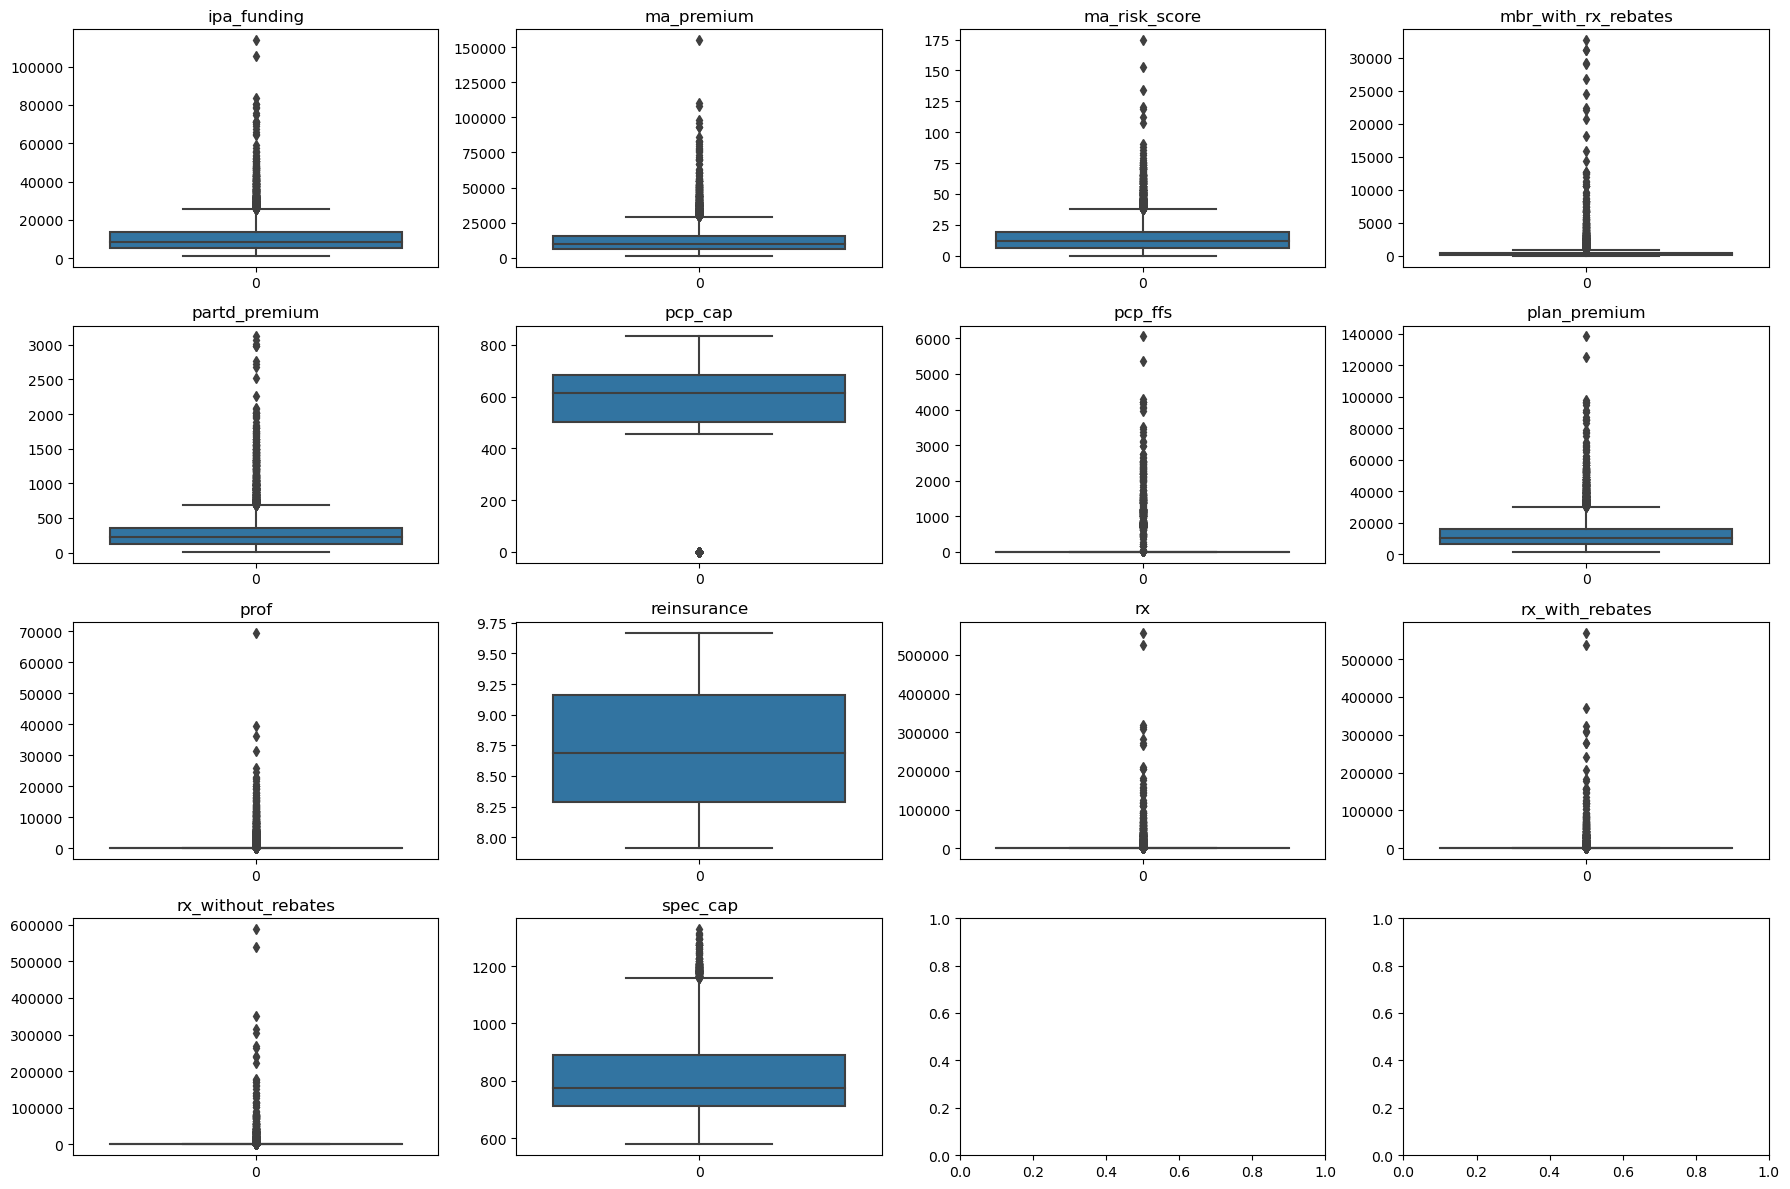

In [23]:
num_plots = len(currency_columns)
num_rows = 4
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for i, currency_column in enumerate(currency_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(data=df[currency_column], ax=ax)
    ax.set_title(currency_column)

plt.tight_layout()
plt.show()

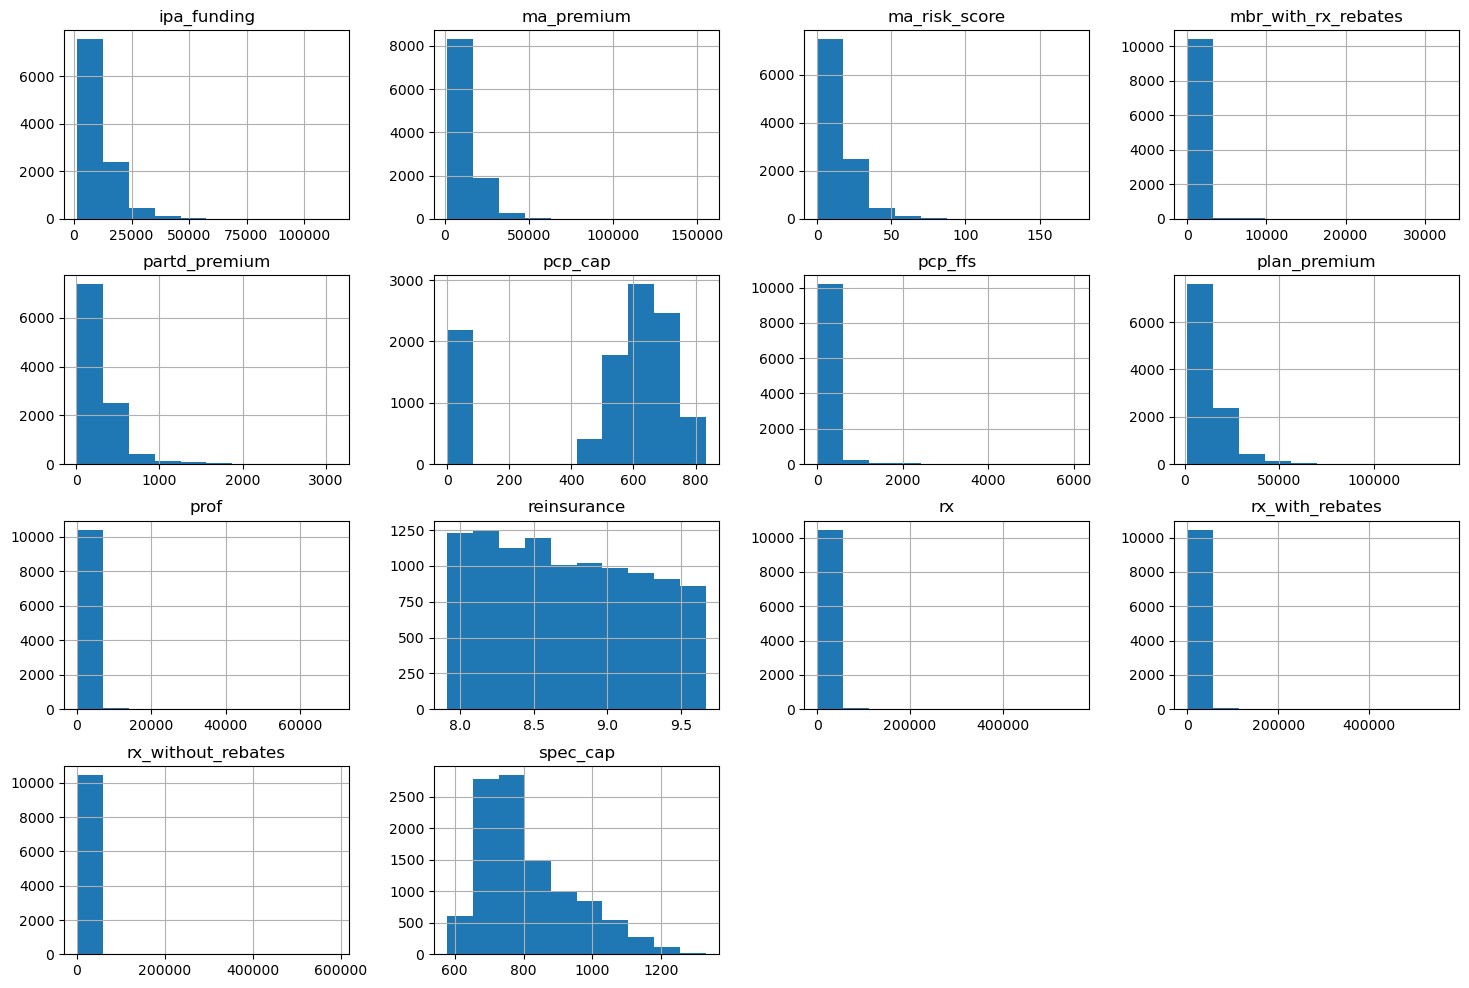

In [18]:
_ = df[currency_columns].hist(figsize=(18, 12))